# 🎵 Spotify Pop vs. Non-Pop Song Classifier

This project predicts whether a track belongs to the **Pop** genre or not,  
based on its musical features such as `danceability`, `energy`, `loudness`, `tempo`, and `valence`.

A simple binary classification task using Spotify data.


In [1]:
# ===============================
# 📦 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid", context="talk")


In [ ]:
# Get the kaggle.json file from your kaggle account and upload it

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d thedevastator/spotify-tracks-genre-dataset


Dataset URL: https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset
License(s): CC0-1.0
  0% 0.00/8.17M [00:00<?, ?B/s]
100% 8.17M/8.17M [00:00<00:00, 1.63GB/s]


In [6]:
!unzip spotify-tracks-genre-dataset.zip -d spotify_data


Archive:  spotify-tracks-genre-dataset.zip
  inflating: spotify_data/train.csv  


In [7]:
# ===============================
# 🎧 2. Load Dataset
# ===============================
# Replace with your local path or Kaggle path

df = pd.read_csv("/content/spotify_data/train.csv")
print(df.shape)
df.head()



(114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-win_amd64.whl.metadata (2.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.3-cp313-cp313-win_amd64.whl.metadata (37 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)
Using cached pyyaml-6.0.3-cp313-cp313-win_amd64.whl (154 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.3-cp313-cp313-win_amd64.whl (107 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)

   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   -------- ------------------------------- 1/5 [pyyaml]
   -------- ------------------------------- 1/5 [pyyaml]
   ---------------- ----------------------- 

In [9]:
import kagglehub
path = kagglehub.dataset_download("thedevastator/spotify-tracks-genre-dataset")

C:\Users\megha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 8.17M/8.17M [00:00<00:00, 9.72MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\megha\.cache\kagglehub\datasets\thedevastator\spotify-tracks-genre-dataset\versions\1


In [21]:
# ===============================
# 1. Load Dataset
# ===============================
import pandas as pd

# Assuming your 'train.csv' is in the project folder
# If you used the Kaggle download method, the path might be different!
# If you downloaded it locally and put it in the folder:
df = pd.read_csv(r"C:\Users\megha\.cache\kagglehub\datasets\thedevastator\spotify-tracks-genre-dataset\versions\1\train.csv")

# If you used the Kaggle download and unzip method, your path might look like this:
# df = pd.read_csv("./spotify_data/train.csv") 

print(df.shape)
df.head()

(114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [22]:
# ===============================
# 2. Data Preparation and Feature Engineering
# ===============================
FEATURE_COLUMNS = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms', 'popularity', 'explicit'
]

# Select only the features and the original target column
df_model = df[FEATURE_COLUMNS + ['track_genre']].copy()

# Create the Binary Target Variable ('is_pop')
TARGET_GENRE = 'pop'
df_model['is_pop'] = df_model['track_genre'].apply(
    lambda x: 1 if x.lower() == TARGET_GENRE else 0
)

# Final Cleanup
df_model = df_model.drop(columns=['track_genre'])

# Separate features (X) and target (y)
X = df_model.drop(columns=['is_pop'])
y = df_model['is_pop']

# (Any print statements you have to verify X and y)

In [23]:
# ===============================
# 3. Scaling and Splitting Data
# ===============================
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# List of continuous columns to scale (all features except the binary 'explicit')
cols_to_scale = X.columns.drop('explicit')

# Apply scaling
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (91200, 12)
X_test shape: (22800, 12)


In [24]:
# ===============================
# 4. Train and Evaluate the Model (with Class Weights)
# ===============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Use class_weight='balanced' to address the 99% vs 1% data imbalance
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
print("Starting Model Training with Balanced Weights...")
model.fit(X_train, y_train)
print("Training Complete!")

# 2. Make Predictions
y_pred = model.predict(X_test)

# 3. Evaluate Performance
print("\n--- Classification Report (Balanced) ---")
print(classification_report(y_test, y_pred, target_names=['Non-Pop (0)', 'Pop (1)']))

accuracy = model.score(X_test, y_test)
print(f"\nOverall Model Accuracy (Balanced): {accuracy:.4f}")

Starting Model Training with Balanced Weights...
Training Complete!

--- Classification Report (Balanced) ---
              precision    recall  f1-score   support

 Non-Pop (0)       0.99      0.99      0.99     22600
     Pop (1)       0.27      0.26      0.26       200

    accuracy                           0.99     22800
   macro avg       0.63      0.62      0.63     22800
weighted avg       0.99      0.99      0.99     22800


Overall Model Accuracy (Balanced): 0.9874



--- Top 10 Most Important Features ---
popularity          0.417873
instrumentalness    0.090267
energy              0.072036
loudness            0.062274
acousticness        0.060362
danceability        0.057779
liveness            0.051076
duration_ms         0.050290
speechiness         0.046684
valence             0.045935
dtype: float64


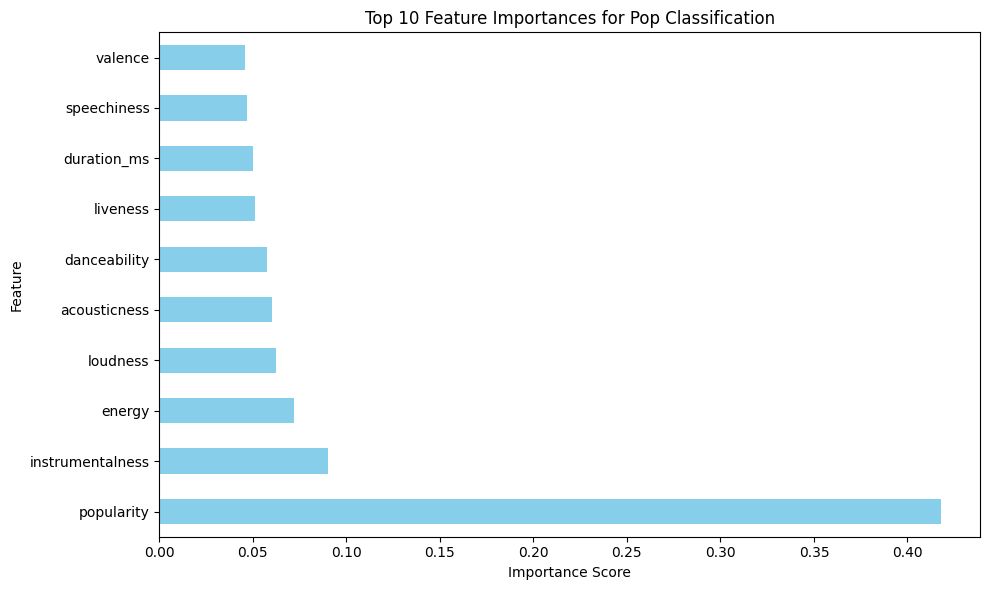

In [25]:
# ===============================
# 5. Feature Importance and Interpretation
# ===============================
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the trained Random Forest model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort the features by importance and select the top 10
top_10_features = feature_importances.sort_values(ascending=False).head(10)

print("\n--- Top 10 Most Important Features ---")
print(top_10_features)

# Plotting the results
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances for Pop Classification')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_plot.png')